In [ ]:
!pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 40.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993223 sha256=c526fd718e2b3d387b095dfbe31f51e31c20edea6005017964801a1f232942f6
  Stored in directory: /root/.cache/pip/wheels/c1/67/88/e844b5b022812e15a52e4eaa38a1e709e99f06f6639d7e3ba7
Successfully built langdetect


#STOCK MARKET PRCIE without SENTIMENT

In [ ]:
tsla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257 entries, 0 to 1256
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1257 non-null   datetime64[ns]
 1   Close   1257 non-null   float64       
 2   High    1257 non-null   float64       
 3   Low     1257 non-null   float64       
 4   Open    1257 non-null   float64       
 5   Volume  1257 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 59.1 KB


#LSTM

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Assume tsla dataframe is ready with "Date" and "Close"
tsla = tsla.copy()
tsla = tsla.sort_values("Date")  # ensure time order

# SAVE THE DATASET TO CSV FIRST
tsla.to_csv('tsla_stock_data.csv', index=False)
print("TSLA dataset saved to 'tsla_stock_data.csv'")

# Continue with your LSTM code
data = tsla[["Close"]].values

# Normalize (important for LSTM)
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data)

# Train/test split (80% train)
train_size = int(len(scaled_data)*0.8)
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]

# Function to create sequences
def create_sequences(dataset, time_step=60):
    X, y = [], []
    for i in range(len(dataset)-time_step-1):
        X.append(dataset[i:(i+time_step), 0])
        y.append(dataset[i+time_step, 0])
    return np.array(X), np.array(y)

time_step = 60
X_train, y_train = create_sequences(train_data, time_step)
X_test, y_test = create_sequences(test_data, time_step)

# Reshape to [samples, time_steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test  = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

print("Data preparation completed!")
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

TSLA dataset saved to 'tsla_stock_data.csv'
Data preparation completed!
Training data shape: (944, 60, 1)
Testing data shape: (191, 60, 1)


In [ ]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Train
history = model.fit(X_train, y_train, batch_size=64, epochs=20, validation_data=(X_test, y_test), verbose=1)


Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0599 - val_loss: 0.0176
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0084 - val_loss: 0.0057
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0050 - val_loss: 0.0040
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0047 - val_loss: 0.0032
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0041 - val_loss: 0.0033
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0032 - val_loss: 0.0033
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0034 - val_loss: 0.0033
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0034 - val_loss: 0.0031
Epoch 9/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0031 - val_loss: 0.0031
Epoch 10/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0029 - val_loss: 0.0041
Epoch 11/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0033 - val_loss: 0.0026
Epoch 12/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0024 - val_l

30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


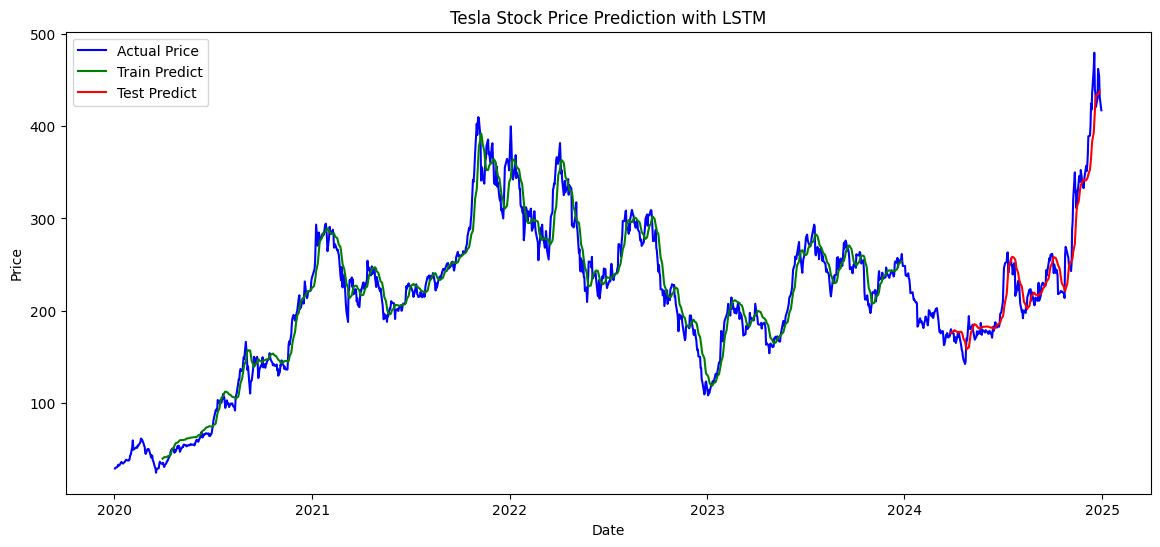

In [ ]:
# Predict
train_predict = model.predict(X_train)
test_predict  = model.predict(X_test)

# Inverse scaling
train_predict = scaler.inverse_transform(train_predict)
test_predict  = scaler.inverse_transform(test_predict)
y_train_inv   = scaler.inverse_transform(y_train.reshape(-1,1))
y_test_inv    = scaler.inverse_transform(y_test.reshape(-1,1))

# Align predictions with dates
# Align predictions with dates (fix off-by-one)
train_dates = tsla["Date"][time_step:time_step+len(train_predict)]
test_dates  = tsla["Date"][train_size+time_step:train_size+time_step+len(test_predict)]

# Plot Actual vs Predictions
plt.figure(figsize=(14,6))
plt.plot(tsla["Date"], tsla["Close"], label="Actual Price", color="blue")
plt.plot(train_dates, train_predict, label="Train Predict", color="green")
plt.plot(test_dates, test_predict, label="Test Predict", color="red")
plt.title("Tesla Stock Price Prediction with LSTM")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,accuracy_score
import matplotlib.pyplot as plt

# After making predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
y_train_inv = scaler.inverse_transform(y_train.reshape(-1,1))
y_test_inv = scaler.inverse_transform(y_test.reshape(-1,1))

# Calculate accuracy metrics
def calculate_metrics(actual, predicted):
    mae = mean_absolute_error(actual, predicted)
    mse = mean_squared_error(actual, predicted)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((actual - predicted) / actual)) * 100
    r2 = r2_score(actual, predicted)

    return {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'MAPE': mape,
        'R2_Score': r2
    }

# Calculate metrics for both train and test
train_metrics = calculate_metrics(y_train_inv, train_predict)
test_metrics = calculate_metrics(y_test_inv, test_predict)
print(train_metrics)
print(test_metrics)

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
{'MAE': 11.820400233996114, 'MSE': 245.057366341978, 'RMSE': np.float64(15.654308235817322), 'MAPE': np.float64(5.98715751537202), 'R2_Score': 0.9587031126395191}
{'MAE': 14.505436522798384, 'MSE': 413.73137389608485, 'RMSE': np.float64(20.340387751861684), 'MAPE': np.float64(5.845662653109626), 'R2_Score': 0.9273650955019453}


In [ ]:
import pandas as pd
from langdetect import detect, DetectorFactory
from textblob import TextBlob
import yfinance as yf

In [ ]:
import requests
DetectorFactory.seed = 0  # stable language detection

# -----------------------------
# 1. Fetch news headlines from GDELT
# -----------------------------
url = "https://api.gdeltproject.org/api/v2/doc/doc"
params = {
    "query": "Tesla",
    "mode": "ArtList",
    "format": "JSON",
    "maxrecords": 250,   # you can loop for more
    "sort": "DateDesc"
}

response = requests.get(url, params=params)

if response.status_code != 200:
    raise Exception(f"GDELT API error: {response.status_code}")

data = response.json()

In [ ]:
# Extract articles
articles = data.get("articles", [])
df = pd.DataFrame(articles)

# Keep only useful columns
df = df[["url", "title", "seendate"]]
df["Date"] = pd.to_datetime(df["seendate"].str[:8], format="%Y%m%d")

# -----------------------------
# 2. Filter English headlines
# -----------------------------
def detect_lang(text):
    try:
        return detect(str(text))
    except:
        return "error"

df["lang"] = df["title"].apply(detect_lang)
df_en = df[df["lang"] == "en"].reset_index(drop=True)

In [ ]:
df.head()

,url,title,seendate,Date,lang
0,https://abc17news.com/news/national-world/cnn-...,"5 things to know for Sept . 8 : ICE raids , Je...",20250908T154500Z,2025-09-08,en
1,https://dothaneagle.com/news/nation-world/arti...,"South Korea , US reach deal over workers ; Alc...",20250908T154500Z,2025-09-08,en
2,https://vreme.com/vesti/izmene-u-saobracaju-u-...,Izmene u saobraćaju u Beogradu zbog vojne parade,20250908T154500Z,2025-09-08,hr
3,https://www.webpronews.com/trumps-emissions-ro...,Trump Emissions Rollback Could Save Detroit Au...,20250908T154500Z,2025-09-08,en
4,https://www.163.com/dy/article/K8VAIS800512B07...,多家头部公司老总详解算力 军备竞赛 规模之争 ： 年内上线超百万卡集群OR三年内不太可能...,20250908T154500Z,2025-09-08,zh-cn


In [ ]:
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification

model_name = "ProsusAI/finbert"
tokenizer = AutoTokenizer.from_pretrained(model_name)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/252 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/758 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [ ]:
text = "Tesla gets a finding of 25 Billion dollars in its favor from a jury in a lawsuit filed by a former employee who claimed he was fired for reporting safety violations at the company's factory in Fremont, California."
encoded_text = tokenizer(text)
print(encoded_text)

{'input_ids': [101, 26060, 4152, 1037, 4531, 1997, 2423, 4551, 6363, 1999, 2049, 5684, 2013, 1037, 6467, 1999, 1037, 9870, 6406, 2011, 1037, 2280, 7904, 2040, 3555, 2002, 2001, 5045, 2005, 7316, 3808, 13302, 2012, 1996, 2194, 1005, 1055, 4713, 1999, 22550, 1010, 2662, 1012, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [ ]:
tokens = tokenizer.convert_ids_to_tokens(encoded_text.input_ids)
print(tokens)

['[CLS]', 'tesla', 'gets', 'a', 'finding', 'of', '25', 'billion', 'dollars', 'in', 'its', 'favor', 'from', 'a', 'jury', 'in', 'a', 'lawsuit', 'filed', 'by', 'a', 'former', 'employee', 'who', 'claimed', 'he', 'was', 'fired', 'for', 'reporting', 'safety', 'violations', 'at', 'the', 'company', "'", 's', 'factory', 'in', 'fremont', ',', 'california', '.', '[SEP]']


In [ ]:
tokenizer.vocab_size, tokenizer.model_max_length

(30522, 512)

In [ ]:
def tokenize(batch):
    return tokenizer(batch, padding=True, truncation=True)

# Tokenize first headline
print(tokenize([df_en['title'][0]]))

# Or tokenize a small batch
print(tokenize(df_en['title'][:5].tolist()))

{'input_ids': [[101, 1019, 2477, 2000, 2113, 2005, 17419, 1012, 1022, 1024, 3256, 11217, 1010, 6744, 2886, 1010, 2373, 7384, 2990, 11008, 1010, 3607, 1011, 5924, 2162, 1010, 26269, 102]], 'token_type_ids': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}
{'input_ids': [[101, 1019, 2477, 2000, 2113, 2005, 17419, 1012, 1022, 1024, 3256, 11217, 1010, 6744, 2886, 1010, 2373, 7384, 2990, 11008, 1010, 3607, 1011, 5924, 2162, 1010, 26269, 102], [101, 2148, 4420, 1010, 2149, 3362, 3066, 2058, 3667, 1025, 2632, 10010, 10936, 5222, 2149, 2330, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 8398, 11768, 4897, 5963, 2071, 3828, 5626, 8285, 12088, 25501, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 2148, 4420, 1010, 2149, 3362, 3066, 2058, 3667, 1025, 2632, 10010, 10936, 5222, 2149, 2330, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 13938, 953

In [ ]:
from transformers import pipeline
import torch

# ✅ Load FinBERT without use_auth_token
sentiment_model = pipeline(
    "sentiment-analysis",
    model="ProsusAI/finbert",
    device=0 if torch.cuda.is_available() else -1   # use GPU if available
)

# ✅ Test
headline ="Tesla gets a finding of 25 Billion dollars in its favor from a jury in a lawsuit filed by a former employee who claimed he was fired for reporting safety violations at the company's factory in Fremont, California."

result = sentiment_model(headline)
print(result)


Device set to use cuda:0


[{'label': 'negative', 'score': 0.8505734801292419}]


In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

model_name = "ProsusAI/finbert"

# Load
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Save locally
save_path = "./finbert_local"
tokenizer.save_pretrained(save_path)
model.save_pretrained(save_path)

print(f"✅ FinBERT saved at {save_path}")

✅ FinBERT saved at ./finbert_local


In [ ]:
# from transformers import pipeline

# # Reload from local
# sentiment_model = pipeline(
#     "sentiment-analysis",
#     model="./finbert_local",
#     tokenizer="./finbert_local"
# )

In [ ]:
import requests
import pandas as pd
from langdetect import detect

url = "https://api.gdeltproject.org/api/v2/doc/doc"
params = {"query": "Tesla", "mode": "ArtList", "format": "JSON", "maxrecords": 50, "sort": "DateDesc"}
response = requests.get(url, params=params)
data = response.json()

articles = data.get("articles", [])
df = pd.DataFrame(articles)[["url", "title", "seendate"]]
df["date"] = pd.to_datetime(df["seendate"].str[:8], format="%Y%m%d")

# Keep English only
df["lang"] = df["title"].apply(lambda x: detect(str(x)) if x else "error")
df = df[df["lang"] == "en"].reset_index(drop=True)

In [ ]:
import requests
import pandas as pd
from datetime import datetime, timedelta
import time

def fetch_gdelt_news(query, start_date, end_date, max_records=100):
    url = "https://api.gdeltproject.org/api/v2/doc/doc"
    params = {
        "query": query,
        "mode": "ArtList",
        "format": "JSON",
        "maxrecords": max_records,
        "sort": "DateDesc",
        "startdatetime": start_date.strftime("%Y%m%d%H%M%S"),
        "enddatetime": end_date.strftime("%Y%m%d%H%M%S")
    }

    try:
        response = requests.get(url, params=params, timeout=30)
        response.raise_for_status()
        data = response.json()
        articles = data.get("articles", [])
        return pd.DataFrame(articles)[["title", "seendate"]] if articles else pd.DataFrame(columns=["title", "seendate"])
    except Exception as e:
        print(f"Error fetching data for {start_date} to {end_date}: {e}")
        return pd.DataFrame(columns=["title", "seendate"])

def fetch_gdelt_news_batch(query, start_year, end_year, total_records=1257):
    all_articles = pd.DataFrame(columns=["title", "seendate"])

    # Calculate number of months to cover
    total_months = (end_year - start_year + 1) * 12
    records_per_month = max(1, total_records // total_months)

    current_date = datetime(start_year, 1, 1)
    end_date = datetime(end_year, 12, 31)

    print(f"Fetching {total_records} articles from {start_year} to {end_year}...")

    while current_date <= end_date and len(all_articles) < total_records:
        # Set end of month
        next_month = current_date.replace(day=28) + timedelta(days=4)
        month_end = next_month - timedelta(days=next_month.day)

        # Ensure we don't go beyond end_date
        month_end = min(month_end, end_date)

        if current_date > month_end:
            current_date = month_end + timedelta(days=1)
            continue

        print(f"Fetching articles for {current_date.strftime('%Y-%m')}...")

        # Fetch articles for this month
        monthly_articles = fetch_gdelt_news(
            query,
            current_date,
            month_end,
            max_records=records_per_month
        )

        if not monthly_articles.empty:
            all_articles = pd.concat([all_articles, monthly_articles], ignore_index=True)
            print(f"  Found {len(monthly_articles)} articles, total: {len(all_articles)}")

        # Move to next month
        current_date = month_end + timedelta(days=1)

        # Add delay to avoid rate limiting
        time.sleep(1)

    # If we have more than needed, trim to exact number
    if len(all_articles) > total_records:
        all_articles = all_articles.head(total_records)

    return all_articles

# Fetch Tesla news from 2020 to 2024
df = fetch_gdelt_news_batch(
    query="Tesla TSLA Elon Musk",  # More specific query
    start_year=2020,
    end_year=2024,
    total_records=1257
)

print(f"\nFetched {len(df)} articles")
print(df.head())

# Save to CSV
df.to_csv('tesla_news_2020_2024.csv', index=False)
print("Data saved to 'tesla_news_2020_2024.csv'")

Fetching 1257 articles from 2020 to 2024...
Fetching articles for 2020-01...
  Found 20 articles, total: 20
Fetching articles for 2020-02...
  Found 20 articles, total: 40
Fetching articles for 2020-03...
  Found 20 articles, total: 60
Fetching articles for 2020-04...
  Found 20 articles, total: 80
Fetching articles for 2020-05...
  Found 20 articles, total: 100
Fetching articles for 2020-06...
  Found 20 articles, total: 120
Fetching articles for 2020-07...
  Found 20 articles, total: 140
Fetching articles for 2020-08...
  Found 20 articles, total: 160
Fetching articles for 2020-09...
  Found 20 articles, total: 180
Fetching articles for 2020-10...
  Found 20 articles, total: 200
Fetching articles for 2020-11...
  Found 20 articles, total: 220
Fetching articles for 2020-12...
  Found 20 articles, total: 240
Fetching articles for 2021-01...
  Found 20 articles, total: 260
Fetching articles for 2021-02...
  Found 20 articles, total: 280
Fetching articles for 2021-03...
  Found 20 articl

In [ ]:
df.head()

,title,seendate
0,Ron Baron Baron Funds 4th - Quarter Shareholde...,20200131T224500Z
1,"Tesla Showing Similarities to 2017 Bitcoin , W...",20200131T221500Z
2,"Tesla Shorts Extend Losses , Scurry Positions ...",20200131T221500Z
3,Tesla : Tracking The Amazon / Apple Paradigms ...,20200131T211500Z
4,"Coronavirus , Face Masks to China , and the He...",20200131T200000Z


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     1200 non-null   object
 1   seendate  1200 non-null   object
dtypes: object(2)
memory usage: 18.9+ KB


Sentiment Score Prediction Time

In [ ]:
import torch
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from tqdm import tqdm

# Load local FinBERT
save_path = "./finbert_local"
tokenizer = AutoTokenizer.from_pretrained(save_path)
model = AutoModelForSequenceClassification.from_pretrained(save_path)

# Function to get sentiment for a single text
def get_sentiment(text):
    try:
        inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512)
        with torch.no_grad():
            outputs = model(**inputs)
        probs = torch.nn.functional.softmax(outputs.logits, dim=-1)
        label_id = torch.argmax(probs).item()
        score = probs[0][label_id].item()
        label = model.config.id2label[label_id]
        return label, score
    except Exception as e:
        print(f"Error processing text: {e}")
        return None, None

# Apply sentiment analysis to all news articles with progress bar
sentiments = []
scores = []

print("Processing sentiment analysis for news articles...")
for title in tqdm(df['title'], desc="Analyzing sentiment"):
    sentiment, score = get_sentiment(title)
    sentiments.append(sentiment)
    scores.append(score)

# Add results to dataframe
df['sentiment'] = sentiments
df['sentiment_score'] = scores

# Display the results
print("\nSentiment analysis completed!")
print(df[['title', 'sentiment', 'sentiment_score']].head(10))

# Show sentiment distribution
print(f"\nSentiment distribution:")
print(df['sentiment'].value_counts())

# Show basic statistics
print(f"\nSentiment score statistics:")
print(df['sentiment_score'].describe())

# Save the results to CSV if needed
df.to_csv('news_with_sentiment.csv', index=False)
print("\nResults saved to 'news_with_sentiment.csv'")

Processing sentiment analysis for news articles...


Analyzing sentiment: 100%|██████████| 1200/1200 [02:30<00:00,  7.99it/s]


Sentiment analysis completed!
                                               title sentiment  \
0  Ron Baron Baron Funds 4th - Quarter Shareholde...   neutral   
1  Tesla Showing Similarities to 2017 Bitcoin , W...   neutral   
2  Tesla Shorts Extend Losses , Scurry Positions ...   neutral   
3  Tesla : Tracking The Amazon / Apple Paradigms ...   neutral   
4  Coronavirus , Face Masks to China , and the He...   neutral   
5  An Ode to Luck : Revisiting My Tesla Inc ( TSL...   neutral   
6  Hear it : Elon Musk drops surprise song dubbed...   neutral   
7  An Ode to Luck : Revisiting My Tesla Inc ( TSL...   neutral   
8  Jeff Bezos Adds $13 . 2 Billion to His Fortune...   neutral   
9  Tesla Management Talks Cybertruck , Model Y , ...   neutral   

   sentiment_score  
0         0.944688  
1         0.927437  
2         0.605785  
3         0.859373  
4         0.780263  
5         0.842251  
6         0.890129  
7         0.842251  
8         0.895845  
9         0.944023  

Sentiment 

WE GOT THE SENTIMENT SCORE , NOW WE WILL MERGE IT WITH TSLA

In [74]:
import pandas as pd

# Assuming you have:
# tsla - 1257 rows of stock data
# news_with_sentiment - 1200 rows with sentiment scores
news_with_sentiment = pd.read_csv('news_with_sentiment.csv')
# Make sure both DataFrames are sorted by date
tsla = tsla.sort_values('Date')
news_with_sentiment = news_with_sentiment.sort_values('seendate')

# Take only the first 1200 rows of TSLA to match the 1200 sentiment scores
tsla_matched = tsla.head(1200).copy()

# Add the sentiment scores directly (assuming they're in the same order)
tsla_matched['sentiment_score'] = news_with_sentiment['sentiment_score'].values

print(f"Original TSLA rows: {len(tsla)}")
print(f"Matched TSLA rows: {len(tsla_matched)}")
print(f"Sentiment scores available: {len(news_with_sentiment)}")

# Display the result
print("\nFirst 10 rows with sentiment scores:")
print(tsla_matched[['Date', 'Close', 'sentiment_score']].head(10))

# Save the matched dataset
tsla_matched.to_csv('tsla_matched_with_sentiment.csv', index=False)
print("\nMatched dataset saved to 'tsla_matched_with_sentiment.csv'")

Original TSLA rows: 1257
Matched TSLA rows: 1200
Sentiment scores available: 1200

First 10 rows with sentiment scores:
        Date      Close  sentiment_score
0 2020-01-02  28.684000         0.608788
1 2020-01-03  29.534000         0.861261
2 2020-01-06  30.102667         0.944023
3 2020-01-07  31.270666         0.574597
4 2020-01-08  32.809334         0.920189
5 2020-01-09  32.089333         0.872916
6 2020-01-10  31.876667         0.944023
7 2020-01-13  34.990665         0.902209
8 2020-01-14  35.861332         0.893738
9 2020-01-15  34.566666         0.574597

Matched dataset saved to 'tsla_matched_with_sentiment.csv'


In [71]:
tsla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257 entries, 0 to 1256
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             1257 non-null   datetime64[ns]
 1   Close            1257 non-null   float64       
 2   High             1257 non-null   float64       
 3   Low              1257 non-null   float64       
 4   Open             1257 non-null   float64       
 5   Volume           1257 non-null   int64         
 6   sentiment_score  1257 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 68.9 KB


#STOCK MARKET PRICE with SENTIMENT SCORE

In [76]:
tsla_matched.head()

,Date,Close,High,Low,Open,Volume,sentiment_score
0,2020-01-02,28.684000,28.713333,28.114000,28.299999,142981500,0.608788
1,2020-01-03,29.534000,30.266666,29.128000,29.366667,266677500,0.861261
2,2020-01-06,30.102667,30.104000,29.333332,29.364668,151995000,0.944023
3,2020-01-07,31.270666,31.441999,30.224001,30.760000,268231500,0.574597
4,2020-01-08,32.809334,33.232666,31.215334,31.580000,467164500,0.920189


Training data shape: (899, 60, 2)
Testing data shape: (179, 60, 2)
Training LSTM model...
Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0864 - val_loss: 0.0025
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0070 - val_loss: 0.0027
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0069 - val_loss: 0.0032
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0052 - val_loss: 0.0020
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0045 - val_loss: 0.0019
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0046 - val_loss: 0.0021
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0042 - val_loss: 0.0017
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0042 - val_loss: 0.0017
Epoch 9/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0047 - val_loss: 0.0018
Epoch 10/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0042 - val_loss: 0.0017
Epoch 11/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0039 - val_loss: 0.0015
Epoch 12/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0

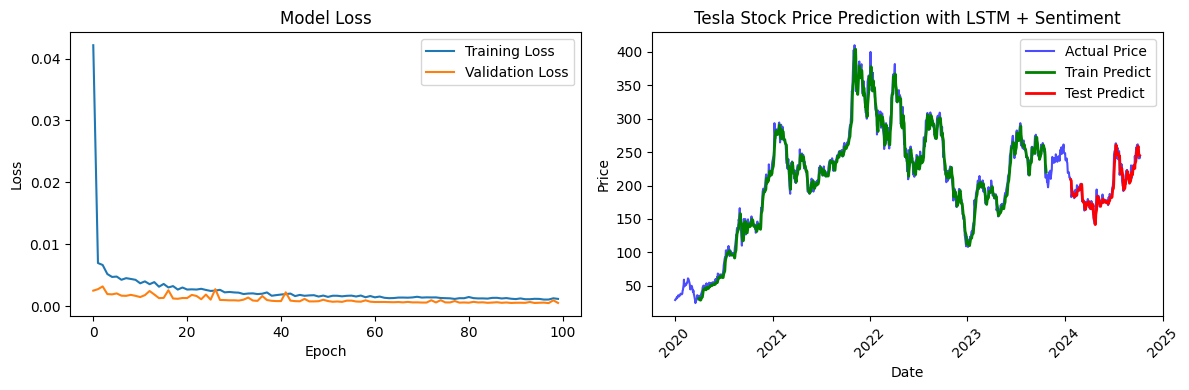

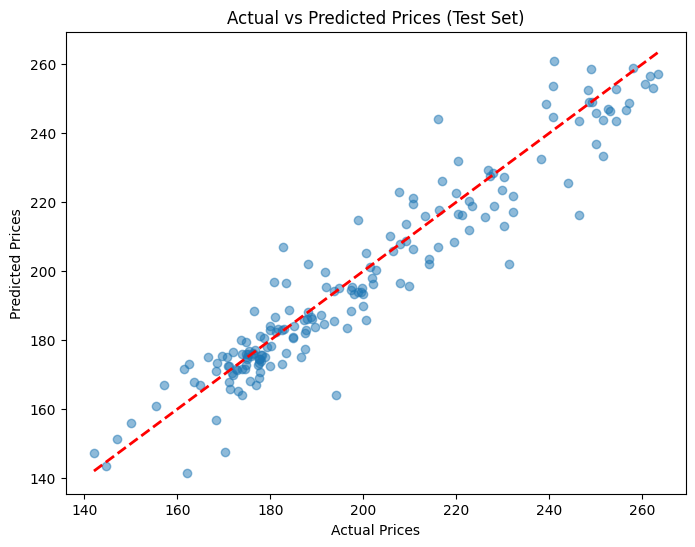


Sample Predictions (Test Set):
           Date  Actual  Predicted  Error
1020 2024-01-23  209.14     208.79   0.35
1021 2024-01-24  207.83     207.87   0.04
1022 2024-01-25  182.63     207.01  24.38
1023 2024-01-26  183.25     196.40  13.15
1024 2024-01-29  190.93     187.12   3.81
1025 2024-01-30  191.59     184.66   6.93
1026 2024-01-31  187.29     185.79   1.50
1027 2024-02-01  188.86     186.02   2.84
1028 2024-02-02  187.91     186.22   1.69
1029 2024-02-05  181.06     186.63   5.57


In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Use your tesla_matched dataset
df = tsla_matched.copy()
df = df.sort_values("Date")  # ensure time order

# Use both Close price and sentiment score as features
features = df[["Close", "sentiment_score"]].values

# Normalize the features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(features)

# Train/test split (80% train)
train_size = int(len(scaled_data) * 0.8)
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]

# Function to create sequences with multiple features
def create_sequences(dataset, time_step=60):
    X, y = [], []
    for i in range(len(dataset) - time_step - 1):
        # Include all features in the sequence
        X.append(dataset[i:(i + time_step), :])
        # Predict only the Close price (first column)
        y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 60
X_train, y_train = create_sequences(train_data, time_step)
X_test, y_test = create_sequences(test_data, time_step)

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

# Build LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
print("Training LSTM model...")
history = model.fit(X_train, y_train,
                    batch_size=32,
                    epochs=100,
                    validation_data=(X_test, y_test),
                    verbose=1)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Since we scaled both features, we need to inverse transform properly
# Create dummy arrays for inverse transformation
def inverse_transform_predictions(predictions, original_data, time_step):
    # Create array with same shape as original scaled data
    dummy_array = np.zeros((len(predictions), original_data.shape[1]))
    dummy_array[:, 0] = predictions.flatten()  # Put predictions in Close column
    # For other columns, use the actual values (we don't have predictions for them)
    # But for inverse transform, we need the same structure
    return scaler.inverse_transform(dummy_array)[:, 0]  # Return only Close prices

# Inverse transform predictions
train_predict_inv = inverse_transform_predictions(train_predict, train_data, time_step)
test_predict_inv = inverse_transform_predictions(test_predict, test_data, time_step)

# Inverse transform actual values
y_train_inv = inverse_transform_predictions(y_train.reshape(-1, 1), train_data, time_step)
y_test_inv = inverse_transform_predictions(y_test.reshape(-1, 1), test_data, time_step)

# Calculate accuracy metrics
def calculate_metrics(actual, predicted):
    mae = mean_absolute_error(actual, predicted)
    mse = mean_squared_error(actual, predicted)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((actual - predicted) / actual)) * 100
    r2 = r2_score(actual, predicted)

    return {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'MAPE': mape,
        'R2_Score': r2
    }

train_metrics = calculate_metrics(y_train_inv, train_predict_inv)
test_metrics = calculate_metrics(y_test_inv, test_predict_inv)

print("\nTraining Set Metrics:")
for metric, value in train_metrics.items():
    print(f"{metric}: {value:.4f}")

print("\nTest Set Metrics:")
for metric, value in test_metrics.items():
    print(f"{metric}: {value:.4f}")

# Align predictions with dates
train_dates = df["Date"][time_step:time_step + len(train_predict_inv)]
test_dates = df["Date"][train_size + time_step:train_size + time_step + len(test_predict_inv)]

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot Actual vs Predictions
plt.subplot(1, 2, 2)
plt.plot(df["Date"], df["Close"], label="Actual Price", color="blue", alpha=0.7)
plt.plot(train_dates, train_predict_inv, label="Train Predict", color="green", linewidth=2)
plt.plot(test_dates, test_predict_inv, label="Test Predict", color="red", linewidth=2)
plt.title("Tesla Stock Price Prediction with LSTM + Sentiment")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Scatter plot of actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test_inv, test_predict_inv, alpha=0.5)
plt.plot([y_test_inv.min(), y_test_inv.max()], [y_test_inv.min(), y_test_inv.max()], 'r--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices (Test Set)')
plt.show()

# Show sample predictions
print("\nSample Predictions (Test Set):")
sample_results = pd.DataFrame({
    'Date': test_dates[:10],
    'Actual': y_test_inv[:10],
    'Predicted': test_predict_inv[:10],
    'Error': np.abs(y_test_inv[:10] - test_predict_inv[:10])
})
print(sample_results.round(2))